In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
from sklearn.preprocessing import MinMaxScaler
from joblib import dump

In [2]:
data_arr = np.load("../data/data_unfiltered.npy")
run_arr = np.load("../data/runs_unfiltered.npy")

# Using a reference run
train_data = data_arr[run_arr == 379456]
train_data

array([[1006.,  830.,  253., ...,    0.,    0.,    0.],
       [ 788.,  653.,  221., ...,    0.,    0.,    0.],
       [ 966.,  775.,  295., ...,    0.,    0.,    0.],
       ...,
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.]])

In [3]:
scaler = MinMaxScaler()
scaler.fit(train_data)
norm_values = scaler.transform(train_data)

In [4]:
n_components = 5
nmf = NMF(n_components=n_components, init='random', random_state=42)
W = nmf.fit_transform(norm_values)
H = nmf.components_

/home/gamoreir/.cache/pypoetry/virtualenvs/ml-examples-EfRPkUGI-py3.11/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [5]:
W

array([[0.28147937, 0.40874575, 0.        , 0.        , 0.35223027],
       [0.29694211, 0.15098742, 0.08550614, 0.11710296, 0.0693247 ],
       [0.32599345, 0.39744153, 0.        , 0.        , 0.12571407],
       ...,
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ]])

In [6]:
H

array([[2.18051558e+00, 2.18959097e+00, 2.04971724e+00, 1.84129636e+00,
        7.96941987e-01, 1.67701993e-01, 2.39089812e-01, 1.19011438e-01,
        0.00000000e+00, 5.95246120e-02, 0.00000000e+00, 1.97102017e-01,
        1.94869875e-01, 6.49098076e-02, 0.00000000e+00, 1.18122689e-01,
        0.00000000e+00, 7.40663193e-02, 4.38661973e-02, 2.11708374e-03,
        1.20318144e-02, 0.00000000e+00, 1.17250056e-02, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.37239722e-02, 5.79590510e-03,
        8.92843576e-03, 4.58033600e-03, 0.00000000e+00, 1.64654045e-04,
        1.04698190e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.55934448e-01, 4.84317422e-01, 3.48888646e-01, 4.77956218e-01,
       

In [7]:
reconstructed = np.dot(W, H)

In [8]:
mse = np.mean((norm_values - reconstructed)**2, axis=1)
mse

array([0.00130155, 0.02356598, 0.00353639, ..., 0.        , 0.        ,
       0.        ])

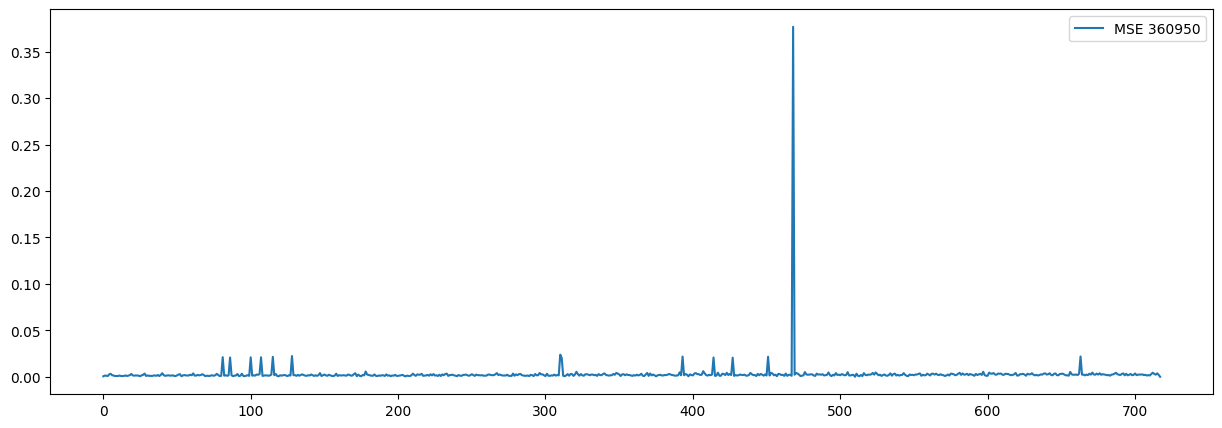

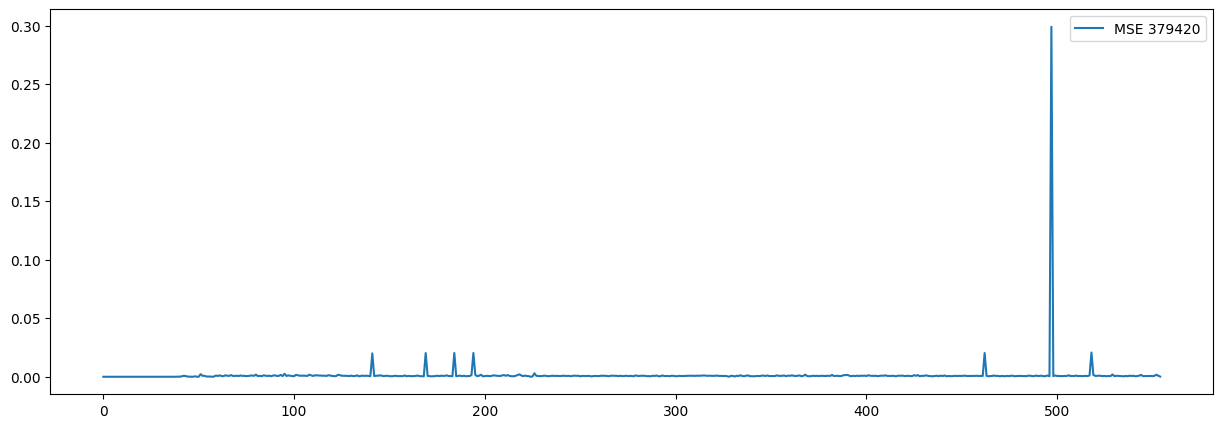

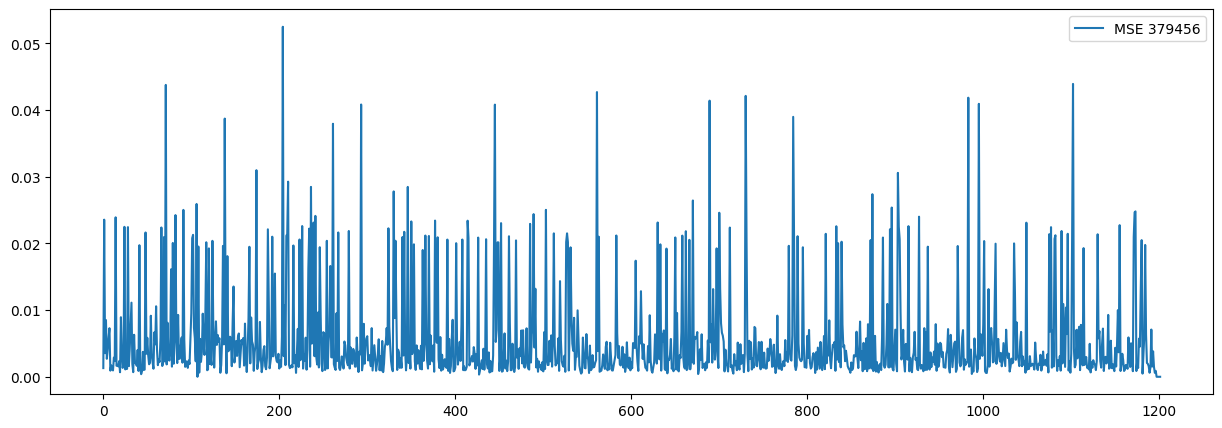

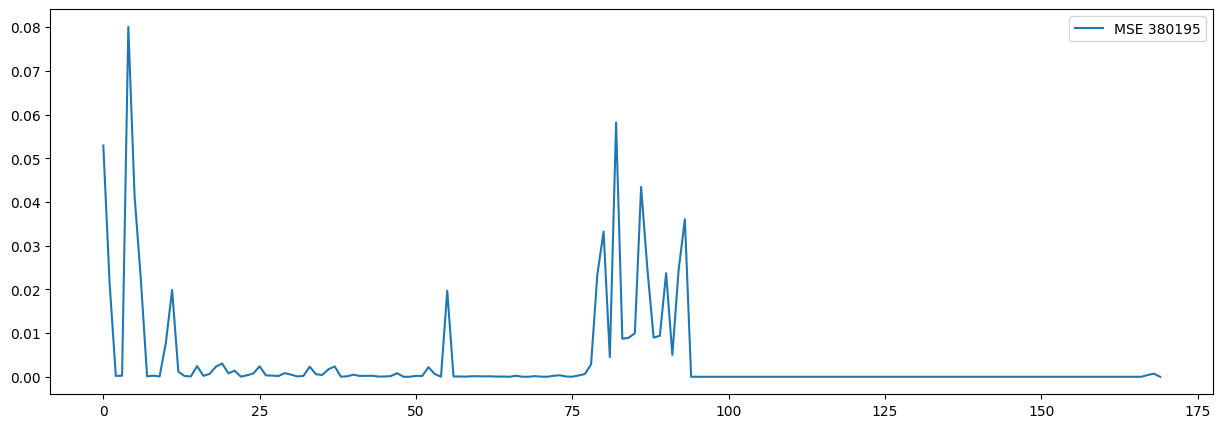

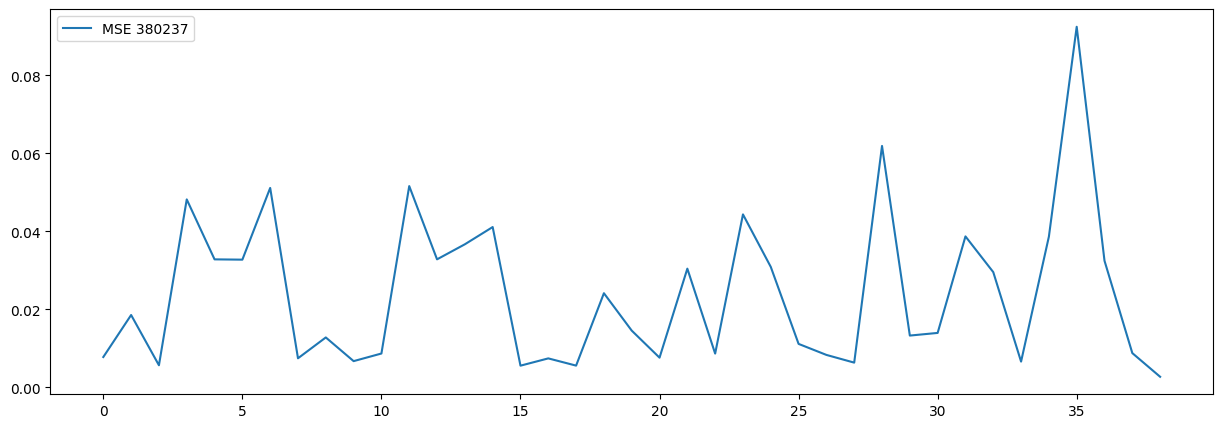

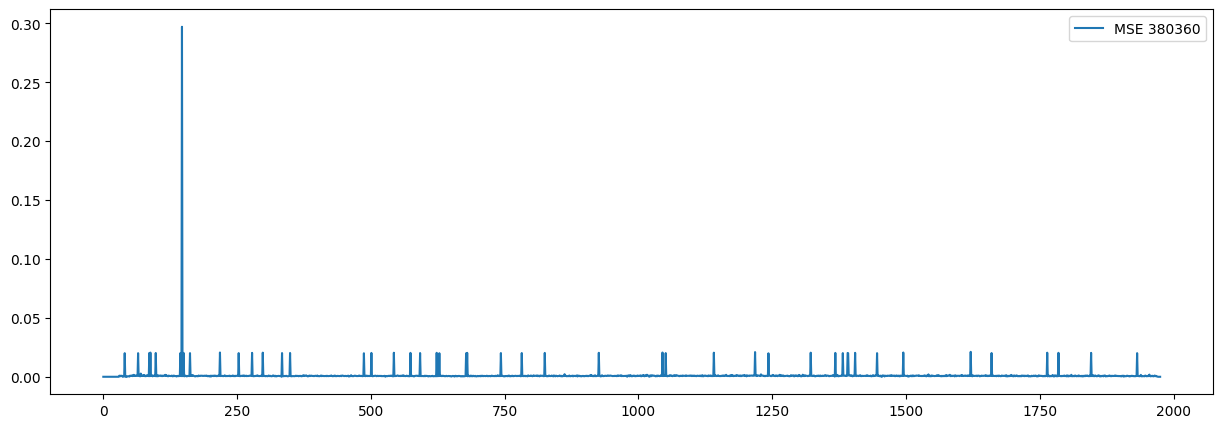

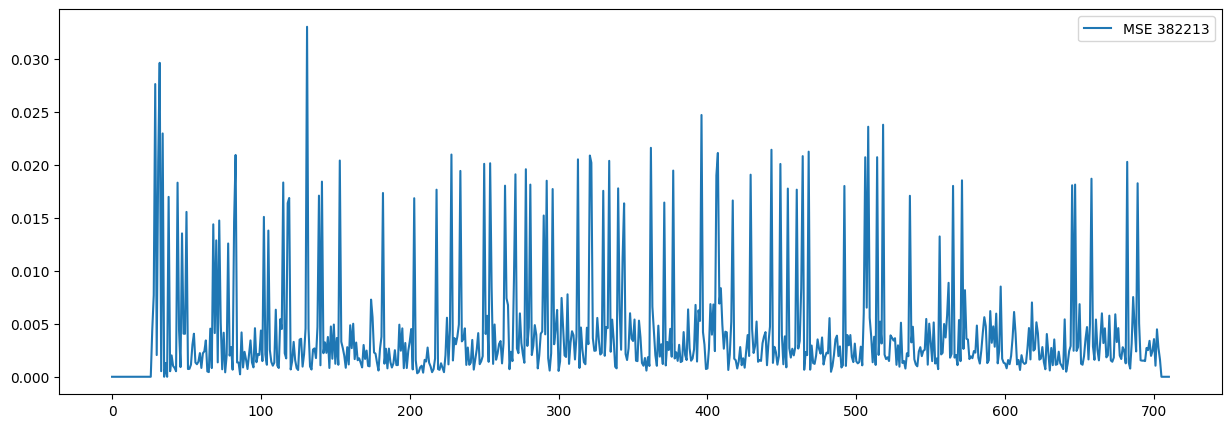

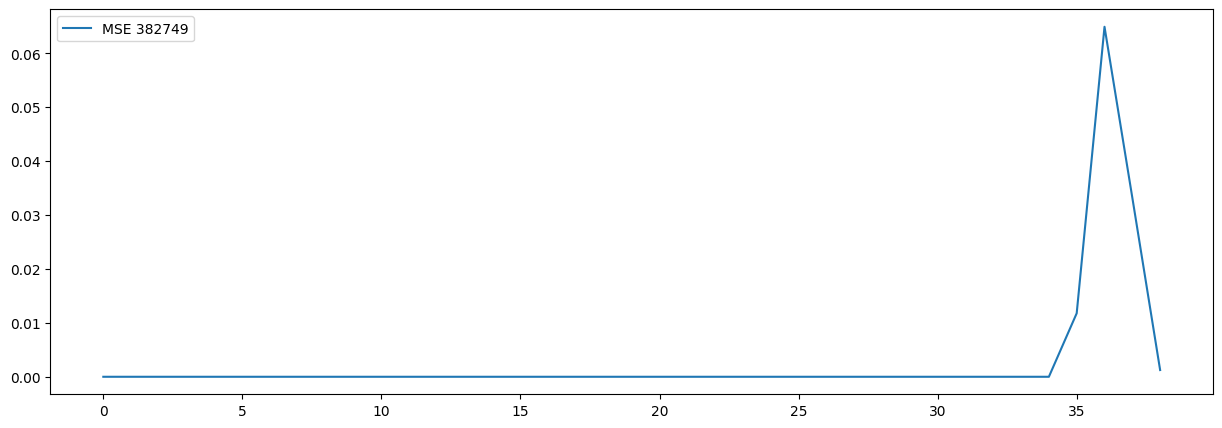

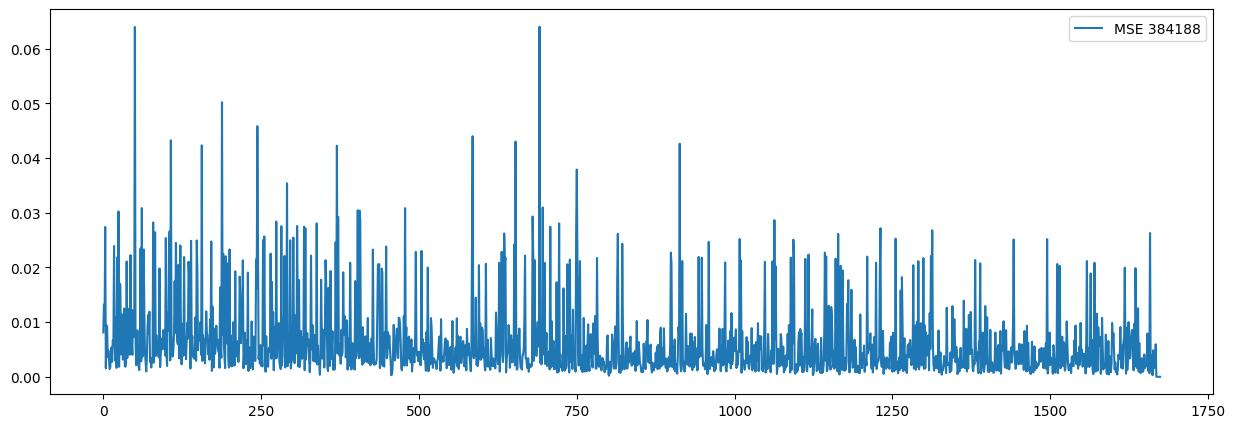

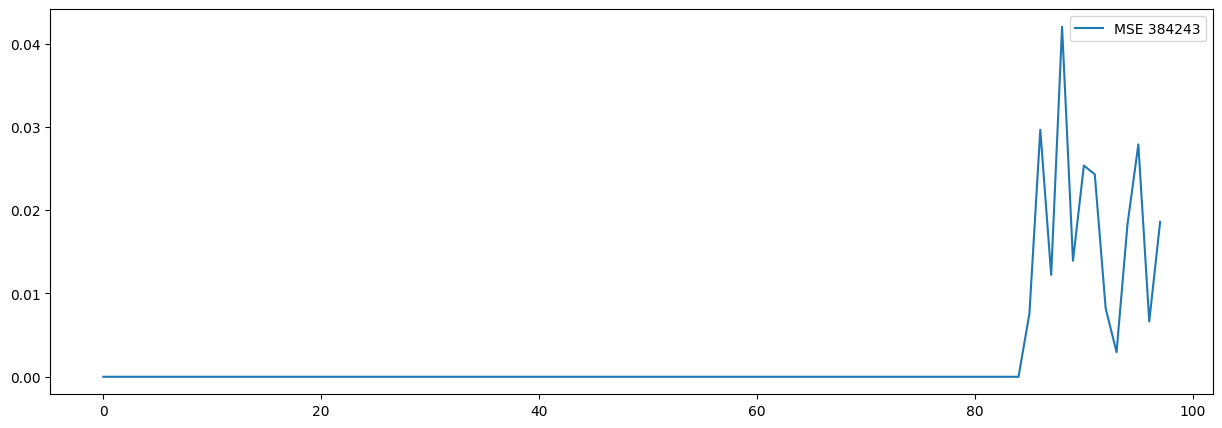

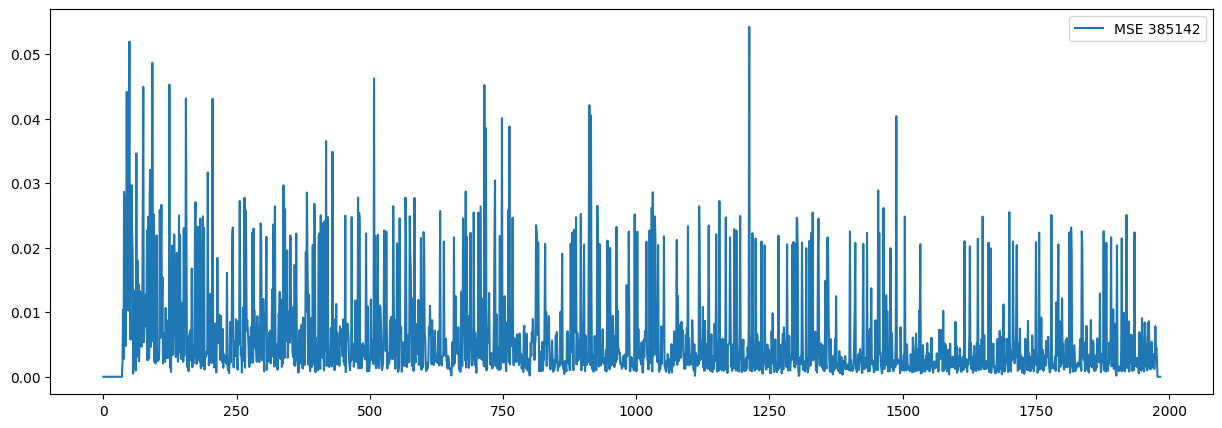

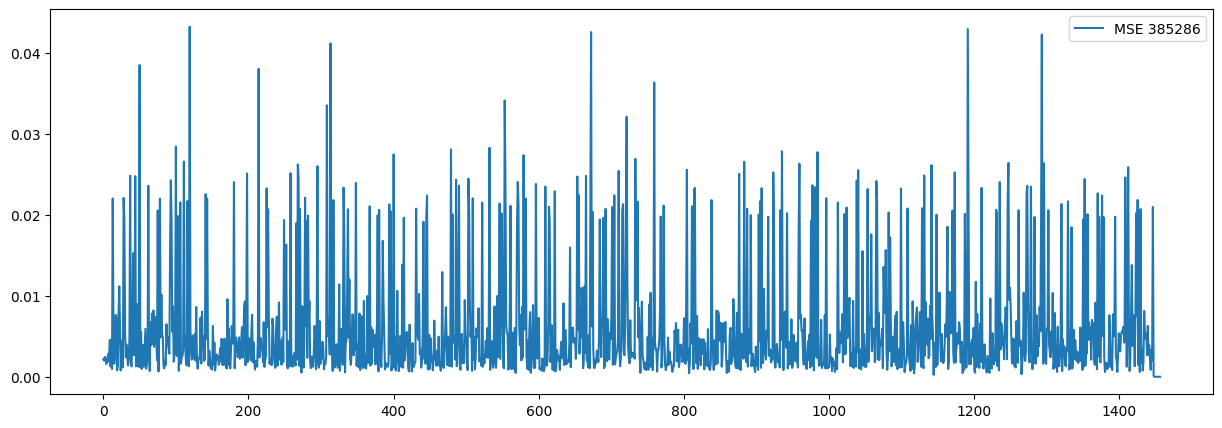

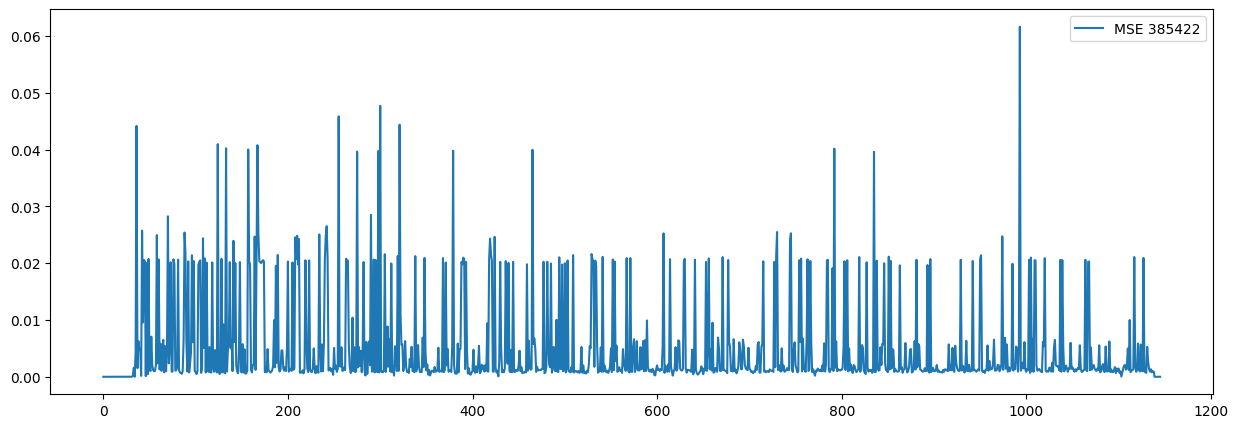

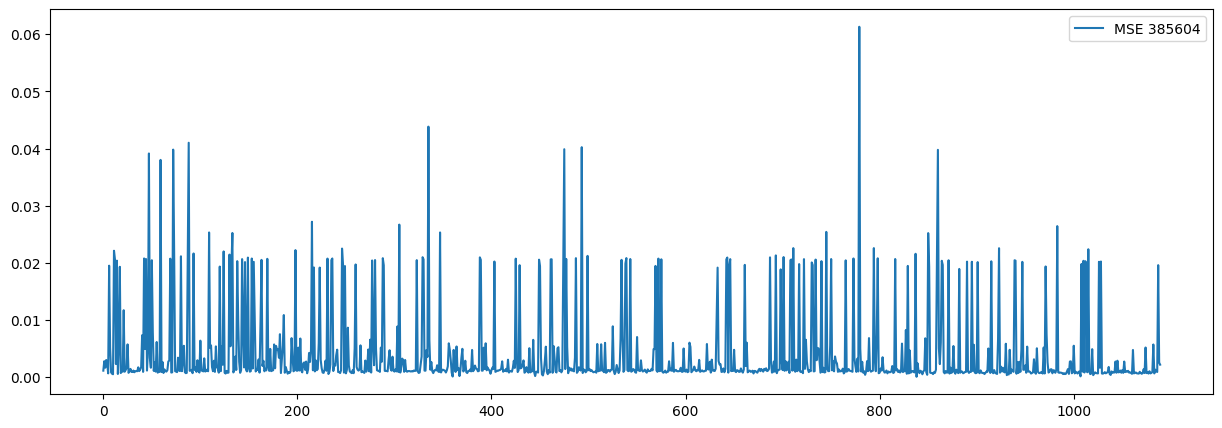

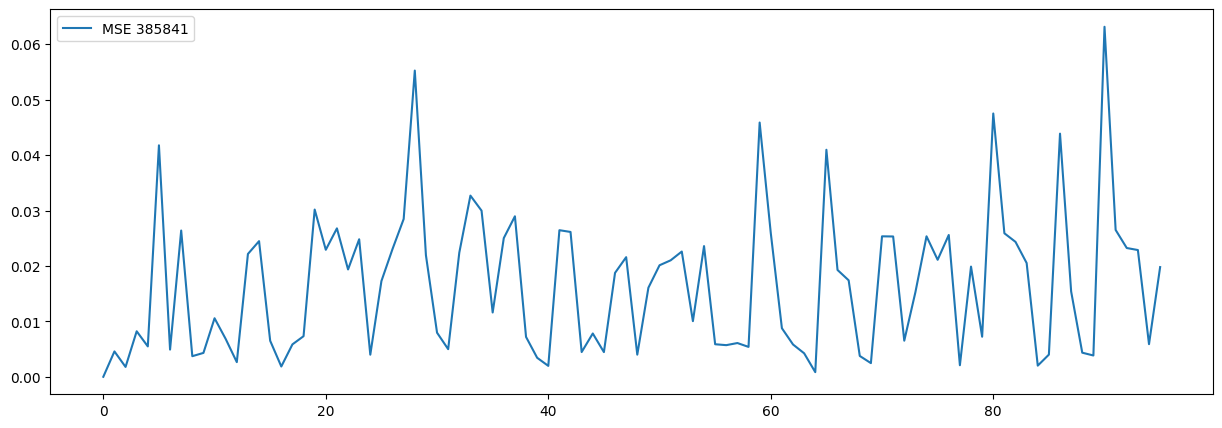

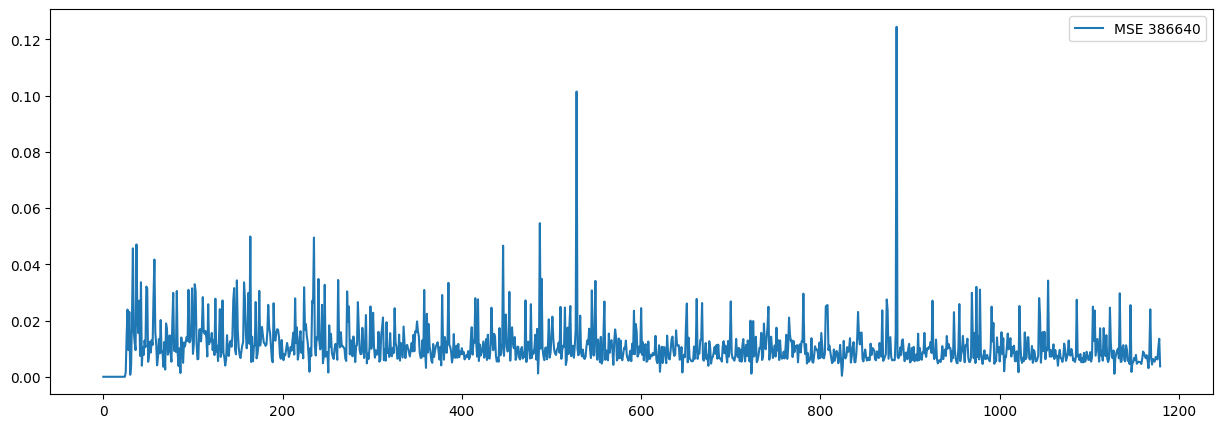

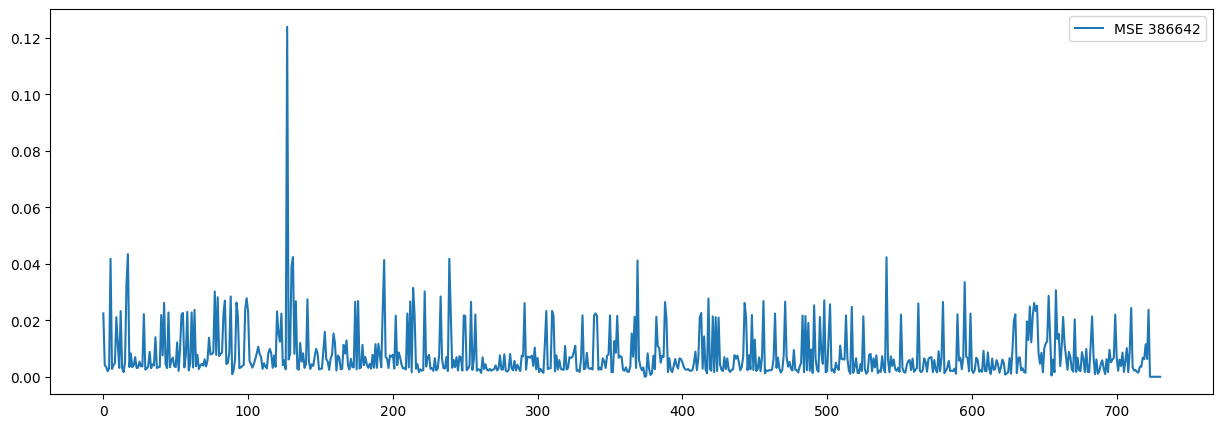

In [10]:
for run_number in np.unique(run_arr):
    test_data = data_arr[run_arr == run_number]

    scaler = MinMaxScaler()
    scaler.fit(test_data)
    test_data = scaler.transform(test_data)

    W_new = nmf.transform(test_data)
    reconstructed = np.dot(W_new, H)
    mse = np.mean((test_data - reconstructed)**2, axis=1)

    plt.figure(figsize=(15, 5))
    plt.plot(range(mse.shape[0]), mse, label=f"MSE {run_number}")
    plt.legend()
    plt.show()
    plt.close()

In [11]:
os.makedirs("../models/scikit", exist_ok=True)
dump(nmf, '../models/scikit/model.joblib')

['../models/scikit/model.joblib']